In [1]:
# Data handling
import pandas as pd

# Preprocessing & Model building
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [2]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Select relevant columns and drop missing values
ml_df = df[['type', 'country', 'release_year', 'rating', 'listed_in']].dropna()

# Quick preview
ml_df.head()


,type,country,release_year,rating,listed_in
0,Movie,United States,2020,PG-13,Documentaries
1,TV Show,South Africa,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,India,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,"Dramas, Independent Movies, International Movies"
8,TV Show,United Kingdom,2021,TV-14,"British TV Shows, Reality TV"


In [4]:
# Make a copy to work with
data = ml_df.copy()

# Encode target label
le_type = LabelEncoder()
data['type'] = le_type.fit_transform(data['type'])  # Movie = 1, TV Show = 0

# Encode features
le_country = LabelEncoder()
le_rating = LabelEncoder()
le_genre = LabelEncoder()

data['country'] = le_country.fit_transform(data['country'])
data['rating'] = le_rating.fit_transform(data['rating'])
data['listed_in'] = le_genre.fit_transform(data['listed_in'])

# View final encoded dataset
data.head()


,type,country,release_year,rating,listed_in
0,0,603,2020,7,266
1,1,426,2021,11,401
4,1,251,2021,11,380
7,0,663,1993,11,308
8,1,506,2021,9,110


In [5]:
X = data.drop('type', axis=1)  # Features (input)
y = data['type']               # Target (output)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict using test data
y_pred = model.predict(X_test)


In [7]:
print("🔎 Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


🔎 Accuracy Score: 0.7536050156739812

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85      1150
           1       0.63      0.28      0.39       445

    accuracy                           0.75      1595
   macro avg       0.70      0.61      0.62      1595
weighted avg       0.73      0.75      0.72      1595



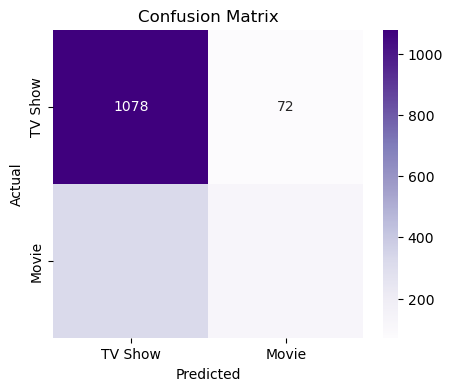

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['TV Show', 'Movie'], yticklabels=['TV Show', 'Movie'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
